In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5104 - accuracy: 0.8213
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3155 - accuracy: 0.8838
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3580 - accuracy: 0.8709


In [37]:
# Returns the loss value & metrics values for the model in test mode.
print(test_loss)

[0.3579568862915039, 0.8708999752998352]


#### Using CNN

In [55]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

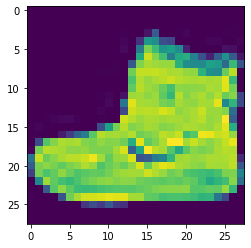

In [63]:
plt.imshow(training_images[0])

In [64]:
print(f"Train images shape:{training_images.shape}")
print(f"Test images shape:{test_images.shape}")

Train images shape:(60000, 28, 28, 1)
Test images shape:(10000, 28, 28, 1)


We need to add channel specyfing type of image: greyscale or RGB

In [65]:
training_images= training_images.reshape(-1,28,28,1)
test_images= test_images.reshape(-1,28,28,1)

In [66]:
print(f"Train images shape:{training_images.shape}")
print(f"Test images shape:{test_images.shape}")

Train images shape:(60000, 28, 28, 1)
Test images shape:(10000, 28, 28, 1)


In [67]:
# normalizing
training_images = training_images/ 255.0
test_images = test_images/ 255.0

In [68]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

`Conv2D`: recommended to use powers of 2. The deeper into CNN the more filters we can use <br>
`kernel_size`: filter size/ must be odd integer
`maxpooling`: designed to compress the image while maintaining the content of the features what were highlighted by convolution. Using `(2,2)` MaxPooling we create a square that overlaps the image and picks largest out of 4.

In [71]:
model = Sequential()

# add 2 Conv layers with maxpooling
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))# last 3 layers are same as beforehand.

model.add(Flatten()) # flatten matrix before feeding into hidden layer
model.add(Dense(128, activation='relu')) # hidden layer
model.add(Dense(10, activation='softmax')) # output for 10 classes

In [72]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

`(None, 26, 26, 32) `: we started with 28x28 however due to filter size being 3x3 the edges of the image are skipped ex. we cant look at pixel [1,1] instead we look at [2,2]because the edge pixels dont have naighbors from all of the sides <br>
`(None, 13, 13, 32)` Using maxpooling of size (2x2) creates a 2x2 matrix that overlaps with image step by step and pools max value out of each of the 4 pixels and thus it halves the number of vertical and horizontal pixels, thus reducing imageby 25%

In [73]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [74]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 96s 28ms/step - loss: 0.6096 - accuracy: 0.7844
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3157 - accuracy: 0.8828
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2606 - accuracy: 0.9015
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2230 - accuracy: 0.91590s - loss: 0.2230 - accuracy
Epoch 5/5
313/313 [==============================] - 5s 10ms/step - loss: 0.2528 - accuracy: 0.9096


In [75]:
test_loss

[0.25279104709625244, 0.909600019454956]

### Visualizing Convolutions and Pooling

In [80]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [85]:
# lets look for indicies of test_label that match same class ex.9
indices = [i for i, x in enumerate(test_labels[:100]) if x == 9]

In [86]:
indices

[0, 23, 28, 39, 68, 83]

We now wish to visualize the effect of our filters on the images. We can see the effect of first convolution->pooling->convolution->pooling

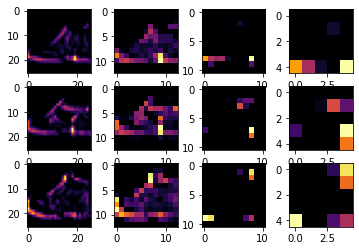

In [143]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

Detects same features